In [10]:
!pip install pandas scikit-learn nltk

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/emotion_dataset.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/emotion_dataset.csv'

In [5]:
import os
os.listdir('/content')


['.config', 'sample_data']

In [8]:
import os
os.listdir('/content')

['.config', 'sample_data']

In [9]:
import pandas as pd

# Load your uploaded file
df = pd.read_csv("/content/emotion_dataset.csv")

# Preview the dataset
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/emotion_dataset.csv'

In [11]:
from google.colab import files
uploaded = files.upload()

Saving emotion_dataset.csv to emotion_dataset.csv


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("emotion_dataset.csv")

# Show first few rows
df.head()

,im feeling rather rotten so im not very ambitious right now;sadness
0,im updating my blog because i feel shitty;sadness
1,i never make her separate from me because i do...
2,i left with my bouquet of red and yellow tulip...
3,i was feeling a little vain when i did this on...
4,i cant walk into a shop anywhere where i do no...


In [13]:
# Split the single column into text and emotion
df[['text', 'emotion']] = df[df.columns[0]].str.split(';', expand=True)

# Drop the original column (optional, since it's now split)
df.drop(columns=[df.columns[0]], inplace=True)

# Check the updated DataFrame
df.head()

,text,emotion
0,im updating my blog because i feel shitty,sadness
1,i never make her separate from me because i do...,sadness
2,i left with my bouquet of red and yellow tulip...,joy
3,i was feeling a little vain when i did this one,sadness
4,i cant walk into a shop anywhere where i do no...,fear


In [14]:
# Check for any nulls
df.isnull().sum()

,0
text,0
emotion,0


In [15]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Preview
df[['text', 'clean_text', 'emotion']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,clean_text,emotion
0,im updating my blog because i feel shitty,im updating blog feel shitty,sadness
1,i never make her separate from me because i do...,never make separate ever want feel like ashamed,sadness
2,i left with my bouquet of red and yellow tulip...,left bouquet red yellow tulips arm feeling sli...,joy
3,i was feeling a little vain when i did this one,feeling little vain one,sadness
4,i cant walk into a shop anywhere where i do no...,cant walk shop anywhere feel uncomfortable,fear


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
X = vectorizer.fit_transform(df['clean_text']).toarray()

# Target variable
y = df['emotion']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.575

Classification Report:
               precision    recall  f1-score   support

       anger       1.00      0.02      0.04        49
        fear       0.67      0.04      0.08        45
         joy       0.52      0.97      0.67       137
        love       0.00      0.00      0.00        31
     sadness       0.68      0.76      0.72       124
    surprise       0.00      0.00      0.00        14

    accuracy                           0.57       400
   macro avg       0.48      0.30      0.25       400
weighted avg       0.59      0.57      0.47       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
def predict_emotion(text):
    # Preprocess text (same cleaning as before)
    cleaned_text = clean_text(text)
    vector = vectorizer.transform([cleaned_text])
    prediction = model.predict(vector)
    return prediction[0]

# Example
print(predict_emotion("I'm feeling so happy and grateful today!"))
print(predict_emotion("I’m scared and don’t know what to do."))

joy
joy


In [19]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters & digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords, then lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)

# Apply to your dataset
df['clean_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Vectorize
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['emotion']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.645
              precision    recall  f1-score   support

       anger       0.85      0.45      0.59        49
        fear       0.71      0.56      0.62        45
         joy       0.55      0.91      0.69       137
        love       1.00      0.32      0.49        31
     sadness       0.74      0.59      0.66       124
    surprise       0.57      0.29      0.38        14

    accuracy                           0.65       400
   macro avg       0.74      0.52      0.57       400
weighted avg       0.70      0.65      0.63       400



In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [23]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

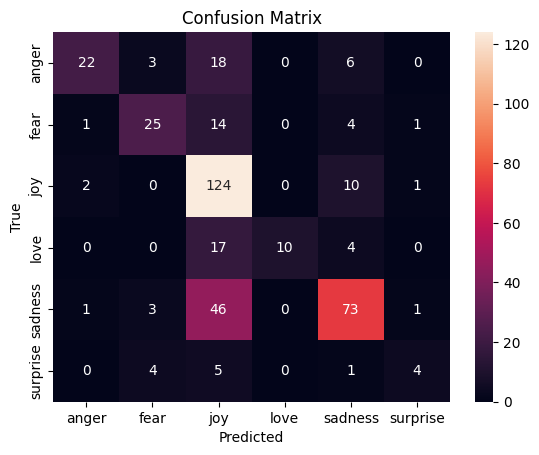

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.5475

Classification Report:
               precision    recall  f1-score   support

       anger       0.72      0.35      0.47        52
        fear       0.74      0.53      0.62        43
         joy       0.46      0.95      0.62       131
        love       0.88      0.20      0.33        35
     sadness       0.69      0.35      0.46       124
    surprise       1.00      0.27      0.42        15

    accuracy                           0.55       400
   macro avg       0.75      0.44      0.49       400
weighted avg       0.65      0.55      0.52       400



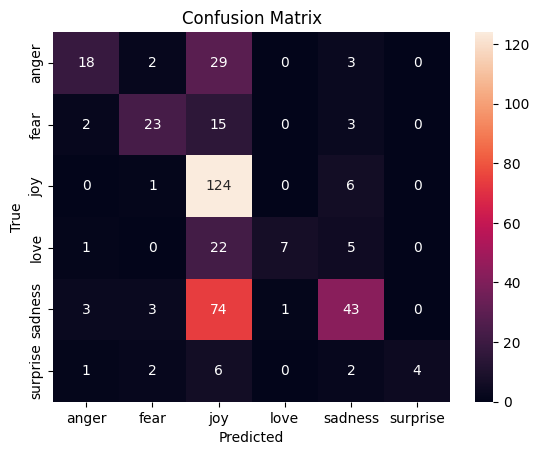


Input Sentence: I’m scared and don’t know what to do.
Predicted Emotion: fear


In [27]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 2. Load dataset
df = pd.read_csv("emotion_dataset.csv", names=["text", "emotion"], sep=";")

# 3. Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# 4. Feature Extraction with TF-IDF + bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['emotion']

# 5. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the model with class_weight
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 7. Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 9. Predict a new input
def predict_emotion(sentence):
    cleaned = clean_text(sentence)
    vec = vectorizer.transform([cleaned])
    prediction = model.predict(vec)
    return prediction[0]

# Example
input_sentence = "I’m scared and don’t know what to do."
print("\nInput Sentence:", input_sentence)
print("Predicted Emotion:", predict_emotion(input_sentence))

In [28]:
print(predict_emotion("I’m so frustrated and angry right now."))
print(predict_emotion("I just got a big gift and I’m surprised!"))

anger
joy
